In [1]:
import os
import pylab
import numpy as np
import scipy
import astropy
from astropy.io import fits
import pandas as pd
%matplotlib inline

In [2]:
dataDir = os.path.normpath("c:/Users/d4eb/Documents/Archon/data/pt_dark01/")

In [3]:
darkFrame1 = os.path.normpath("c:/Users/d4eb/Documents/Archon/data/pt_dark01/photonTranferCurve_darkImage_1100x1100_740.fits")

In [4]:
darkFrame2 = os.path.normpath("c:/Users/d4eb/Documents/Archon/data/pt_dark01/photonTranferCurve_darkImage_1100x1100_741.fits")

In [5]:
#help(fits.info)
fits.info(darkFrame1, output=False)

[(0,
  'PRIMARY',
  'PrimaryHDU',
  7,
  (1100, 1100),
  'int16 (rescales to uint16)',
  '')]

In [6]:
#help(fits.open)
myHDUlist = fits.open(darkFrame1, mode='readonly')
myHDUlist.info()

Filename: c:\Users\d4eb\Documents\Archon\data\pt_dark01\photonTranferCurve_darkImage_1100x1100_740.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       7   (1100, 1100)   int16 (rescales to uint16)   


In [7]:
myHDUlist.fileinfo(0)

{'datLoc': 2880,
 'datSpan': 2422080,
 'file': <astropy.io.fits.file._File <_io.FileIO name='c:\\Users\\d4eb\\Documents\\Archon\\data\\pt_dark01\\photonTranferCurve_darkImage_1100x1100_740.fits' mode='rb' closefd=True>>,
 'filemode': 'readonly',
 'filename': 'c:\\Users\\d4eb\\Documents\\Archon\\data\\pt_dark01\\photonTranferCurve_darkImage_1100x1100_740.fits',
 'hdrLoc': 0,
 'resized': False}

In [8]:
fits.getheader(darkFrame1)

SIMPLE  =                    T / Conform to FITS standard                       
BITPIX  =                   16 / Unsigned short data                            
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1100 / Image width                                    
NAXIS2  =                 1100 / Image height                                   
BZERO   =                32768 / Offset for unsigned short                      
BSCALE  =                    1 / Default scaling factor                         

In [9]:
darkFrame1_data = fits.getdata(darkFrame1,0)
darkFrame1_data
darkFrame2_data = fits.getdata(darkFrame2,0)

In [44]:
np.(darkFrame1_data)

numpy.ndarray

In [10]:
darkFrame1_data.shape

(1100, 1100)

In [11]:
from matplotlib import pyplot as plt

In [12]:
from matplotlib.colors import LogNorm

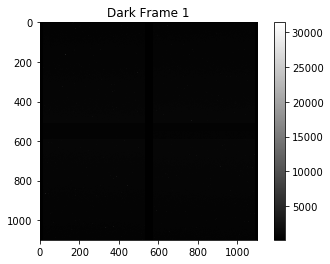

In [13]:
plt.figure()
plt.imshow(darkFrame1_data, cmap='gray', interpolation='none')
plt.colorbar()
plt.title("Dark Frame 1")

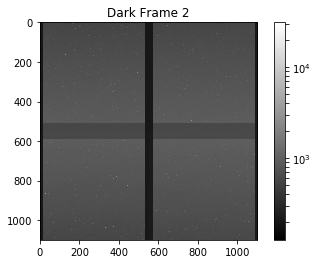

In [14]:
plt.figure()
plt.imshow(darkFrame2_data, cmap='gray', interpolation='none', norm=LogNorm())
plt.colorbar()
plt.title("Dark Frame 2")

In [15]:
darkFrame1_data

array([[155, 127, 128, ..., 128, 127, 126],
       [209, 210, 214, ..., 211, 209, 210],
       [210, 212, 213, ..., 210, 214, 208],
       ..., 
       [207, 215, 217, ..., 224, 222, 223],
       [205, 214, 218, ..., 221, 220, 223],
       [126, 130, 129, ..., 144, 149, 228]], dtype=uint16)

In [16]:
range = darkFrame1_data[800:1000,200:400]
range2 = darkFrame2_data[800:1000,200:400]

In [17]:
range

array([[785, 809, 764, ..., 779, 810, 764],
       [809, 801, 751, ..., 772, 785, 801],
       [808, 789, 761, ..., 783, 785, 797],
       ..., 
       [647, 635, 638, ..., 619, 646, 650],
       [663, 647, 663, ..., 653, 643, 998],
       [629, 665, 636, ..., 636, 633, 620]], dtype=uint16)

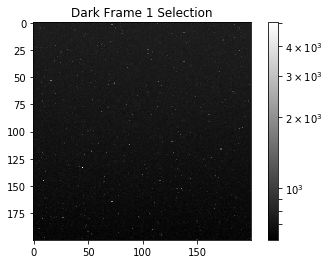

In [18]:
plt.figure()
plt.imshow(range, cmap='gray', interpolation='none', norm=LogNorm())
plt.colorbar()
plt.title("Dark Frame 1 Selection")

In [19]:
np.max(range)

5048

In [20]:
np.min(range)

601

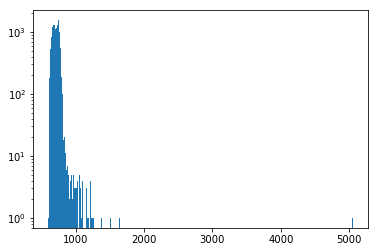

In [23]:
NBINS = 1000
histogram = plt.hist(range.flatten(), NBINS, log=True)

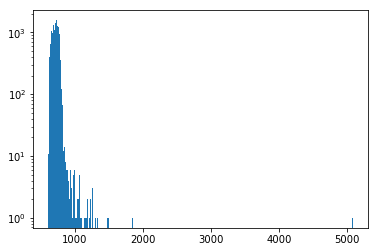

In [33]:
histogram = plt.hist(range2.flatten(), NBINS, log=True)

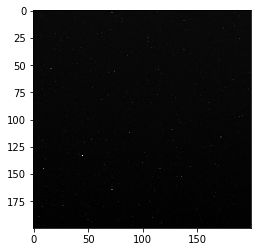

In [22]:
plt.figure()
plt.imshow(range,cmap='gray')

In [51]:
diff12 = range.astype('int32') - range2.astype('int32')

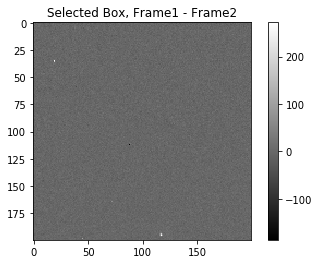

In [52]:
plt.figure()
plt.imshow(diff12, cmap='gray', interpolation='none')
plt.colorbar()
plt.title("Selected Box, Frame1 - Frame2")

In [53]:
range.mean()

713.05184999999994

In [54]:
range2.mean()

713.73395000000005

In [55]:
diff12.mean()

-0.68210000000000004

In [56]:
diff12.max()

272

In [58]:
diff12.min()

-186

In [59]:
diff12.var()

80.239089590000006

In [60]:
np.mean([range.mean(), range2.mean()])

713.39290000000005